# Property prices development over time
This notebook analyses data concerning property prices in various countries around the world trying to answer the following three questions:
1. What are the regions which have experienced the largest increase of property prices since 2000?
2. Where have property prices been the most stable?
3. Are there cases where there is a significant difference between real and nominal price growth?

Entire analysis will be based on the data provided by the **Bank for International Settlements**, for more information please refer to their [website](https://www.bis.org/statistics/full_data_sets.html). The notebook have been prepared on 26/11/2020, should you rerun it later you may reach other conclusions than mine.

In the first step I will download libraries necessary for this exercise.

In [131]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In the next step I will create datasets based on the data on the property prices.

In [132]:
property_url = 'https://www.bis.org/statistics/full_bis_selected_pp_csv.zip'

df_property = pd.read_csv(property_url, compression='zip')

Having the dataframe already donwloaded let me have a look on what we have there.

In [133]:
df_property.shape

(248, 383)

In [134]:
df_property.head(5)

,FREQ,Frequency,REF_AREA,Reference area,VALUE,Value,UNIT_MEASURE,Unit of measure,Time Period,1927-Q1,...,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2
0,Q,Quarterly,4T,Emerging market economies (aggregate),N,Nominal,628,"Index, 2010 = 100",Q:4T:N:628,NaN,...,149.8676,152.2937,154.8087,156.9735,158.3746,160.5252,162.2810,163.7288,165.1958,166.6391
1,Q,Quarterly,4T,Emerging market economies (aggregate),N,Nominal,771,"Year-on-year changes, in per cent",Q:4T:N:771,NaN,...,4.5836,4.3133,5.1965,5.6893,5.6763,5.4050,4.8268,4.3035,4.3070,3.8087
2,Q,Quarterly,4T,Emerging market economies (aggregate),R,Real,628,"Index, 2010 = 100",Q:4T:R:628,NaN,...,111.2322,112.6953,113.2765,113.9492,114.2626,114.8753,114.9632,114.2568,113.9555,115.5456
3,Q,Quarterly,4T,Emerging market economies (aggregate),R,Real,771,"Year-on-year changes, in per cent",Q:4T:R:771,NaN,...,1.5850,1.3195,1.7851,2.3947,2.7244,1.9344,1.4890,0.2699,-0.2688,0.5835
4,Q,Quarterly,5R,Advanced economies,N,Nominal,628,"Index, 2010 = 100",Q:5R:N:628,NaN,...,128.9928,130.3760,131.6304,132.0403,133.0074,134.2992,135.4806,136.4301,138.1523,139.6880


In [135]:
df_property.columns

Index(['FREQ', 'Frequency', 'REF_AREA', 'Reference area', 'VALUE', 'Value',
       'UNIT_MEASURE', 'Unit of measure', 'Time Period', '1927-Q1',
       ...
       '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2',
       '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2'],
      dtype='object', length=383)

In [136]:
len(df_property['Reference area'].unique())

62

It seems that the table presents data in a 'wide format'. In the next step I will unpivot the data to have them in the 'long format' which makes further analysis much easier and quicker. But firstly I will drop rows where _Unit of measure_ is equal to _Year-on-year changes, in per cent_.

In [137]:
# select rows to be deleted based on the UNIT_MEASURE
index_property_to_drop_1 = df_property[df_property['UNIT_MEASURE'] == 771].index

# drop selected rows
df_property = df_property.drop(index_property_to_drop_1)

In [138]:
df_property_long = pd.melt(df_property,id_vars = df_property.columns[:9],var_name = 'Period',value_name = 'Property index, 2010 = 100')

In [139]:
df_property_long.shape

(46376, 11)

In [140]:
df_property_long.head()

,FREQ,Frequency,REF_AREA,Reference area,VALUE,Value,UNIT_MEASURE,Unit of measure,Time Period,Period,"Property index, 2010 = 100"
0,Q,Quarterly,4T,Emerging market economies (aggregate),N,Nominal,628,"Index, 2010 = 100",Q:4T:N:628,1927-Q1,NaN
1,Q,Quarterly,4T,Emerging market economies (aggregate),R,Real,628,"Index, 2010 = 100",Q:4T:R:628,1927-Q1,NaN
2,Q,Quarterly,5R,Advanced economies,N,Nominal,628,"Index, 2010 = 100",Q:5R:N:628,1927-Q1,NaN
3,Q,Quarterly,5R,Advanced economies,R,Real,628,"Index, 2010 = 100",Q:5R:R:628,1927-Q1,NaN
4,Q,Quarterly,AE,United Arab Emirates,N,Nominal,628,"Index, 2010 = 100",Q:AE:N:628,1927-Q1,NaN


As we see above, there are some NaNs in the value column. Let me check if there are any other problems of this kind.

In [141]:
df_property_long.isnull().sum()/df_property_long.shape[0]

FREQ                          0.000000
Frequency                     0.000000
REF_AREA                      0.000000
Reference area                0.000000
VALUE                         0.000000
Value                         0.000000
UNIT_MEASURE                  0.000000
Unit of measure               0.000000
Time Period                   0.000000
Period                        0.000000
Property index, 2010 = 100    0.682724
dtype: float64

Interestingly, there are missing values for 69% records, which is a lot! Let me use original dataset to see how this problem look like split by quarters.

In [142]:
(df_property.isnull().sum()/df_property.shape[0]).sort_values(ascending=False).head(30)

1938-Q3    0.991935
1936-Q4    0.991935
1942-Q2    0.991935
1942-Q1    0.991935
1941-Q4    0.991935
1941-Q3    0.991935
1941-Q2    0.991935
1941-Q1    0.991935
1940-Q4    0.991935
1940-Q3    0.991935
1940-Q2    0.991935
1940-Q1    0.991935
1939-Q4    0.991935
1939-Q3    0.991935
1939-Q2    0.991935
1938-Q4    0.991935
1937-Q4    0.991935
1937-Q3    0.991935
1937-Q2    0.991935
1942-Q3    0.991935
1942-Q4    0.991935
1943-Q1    0.991935
1945-Q3    0.991935
1938-Q2    0.991935
1938-Q1    0.991935
1946-Q4    0.991935
1946-Q3    0.991935
1946-Q2    0.991935
1946-Q1    0.991935
1945-Q4    0.991935
dtype: float64

Quick look at the sorted data shows that we encounter issue with NaN for quarters covering the oldest data. As I would like to analyse data starting from 2000 only let me check how it looks like for this period.

In [143]:
df_property_since_2000 = df_property.drop(columns = df_property.columns[9:df_property.columns.get_loc('2000-Q1')])

(df_property_since_2000.isnull().sum()/df_property_since_2000.shape[0]).sort_values(ascending=False).head(20)

2000-Q1    0.467742
2000-Q2    0.467742
2000-Q3    0.467742
2000-Q4    0.467742
2001-Q1    0.435484
2001-Q2    0.435484
2001-Q3    0.435484
2001-Q4    0.435484
2002-Q1    0.370968
2002-Q2    0.370968
2002-Q3    0.370968
2002-Q4    0.370968
2004-Q3    0.354839
2003-Q4    0.354839
2004-Q4    0.354839
2004-Q2    0.354839
2004-Q1    0.354839
2003-Q3    0.354839
2003-Q2    0.354839
2003-Q1    0.354839
dtype: float64

There are still some data missing for the early 2000s but the issue is less persistent than earlier. Let me investigate for which regions the data is missing.

In [144]:
df_property_since_2000[df_property_since_2000['2000-Q1'].isna()]['Reference area'].unique()

array(['Emerging market economies (aggregate)', 'Advanced economies',
       'United Arab Emirates', 'Bulgaria', 'Brazil', 'Chile', 'China',
       'Cyprus', 'Czech Republic', 'Estonia', 'Greece', 'Croatia',
       'Hungary', 'Indonesia', 'India', 'Luxembourg', 'Latvia', 'Morocco',
       'Malta', 'Mexico', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Slovenia', 'Slovak Republic', 'Turkey', 'World'],
      dtype=object)

So how many countries in total?

In [145]:
len(df_property_since_2000[df_property_since_2000['2000-Q1'].isna()]['Reference area'].unique())

29

A few years later we see the following:

In [146]:
df_property_since_2000[df_property_since_2000['2009-Q1'].isna()]['Reference area'].unique()

array(['Poland', 'Turkey'], dtype=object)

In [147]:
all_regions_with_missing_data = df_property_since_2000[df_property_since_2000.isna().any(axis=1)]['Reference area'].unique()
print(all_regions_with_missing_data)

['Emerging market economies (aggregate)' 'Advanced economies'
 'United Arab Emirates' 'Bulgaria' 'Brazil' 'Chile' 'China' 'Cyprus'
 'Czech Republic' 'Estonia' 'Greece' 'Croatia' 'Hungary' 'Indonesia'
 'India' 'Luxembourg' 'Latvia' 'Morocco' 'Malta' 'Mexico' 'Philippines'
 'Poland' 'Portugal' 'Romania' 'Russia' 'Slovenia' 'Slovak Republic'
 'Turkey' 'World']


In [148]:
len(all_regions_with_missing_data)

29

Initially the problem with missing data concerns 29 regions however this number goes down and reaches only 2 in 2009. In general there are 31 regions where at least one piece of information is missing in the analysed period of time. <br>
For the sake of simplicity, I will remove all of them. Afterwards I will convert dataset to a long format.

In [149]:
# select rows to be deleted based on the reference area
index_property_to_drop_2 = df_property_since_2000[df_property_since_2000['Reference area'].isin(all_regions_with_missing_data)].index

# drop selected rows
df_property_since_2000 = df_property_since_2000.drop(index_property_to_drop_2)

# unpivot the table creating the long format dataset
df_property_since_2000_long = pd.melt(df_property_since_2000,id_vars = df_property_since_2000.columns[:9],var_name = 'Period',value_name = 'Property index, 2010 = 100')

In [150]:
df_property_since_2000_long.head(10)

,FREQ,Frequency,REF_AREA,Reference area,VALUE,Value,UNIT_MEASURE,Unit of measure,Time Period,Period,"Property index, 2010 = 100"
0,Q,Quarterly,AT,Austria,N,Nominal,628,"Index, 2010 = 100",Q:AT:N:628,2000-Q1,80.2986
1,Q,Quarterly,AT,Austria,R,Real,628,"Index, 2010 = 100",Q:AT:R:628,2000-Q1,98.2444
2,Q,Quarterly,AU,Australia,N,Nominal,628,"Index, 2010 = 100",Q:AU:N:628,2000-Q1,40.5990
3,Q,Quarterly,AU,Australia,R,Real,628,"Index, 2010 = 100",Q:AU:R:628,2000-Q1,55.9766
4,Q,Quarterly,BE,Belgium,N,Nominal,628,"Index, 2010 = 100",Q:BE:N:628,2000-Q1,53.2714
5,Q,Quarterly,BE,Belgium,R,Real,628,"Index, 2010 = 100",Q:BE:R:628,2000-Q1,66.1672
6,Q,Quarterly,CA,Canada,N,Nominal,628,"Index, 2010 = 100",Q:CA:N:628,2000-Q1,47.1797
7,Q,Quarterly,CA,Canada,R,Real,628,"Index, 2010 = 100",Q:CA:R:628,2000-Q1,58.3732
8,Q,Quarterly,CH,Switzerland,N,Nominal,628,"Index, 2010 = 100",Q:CH:N:628,2000-Q1,70.7797
9,Q,Quarterly,CH,Switzerland,R,Real,628,"Index, 2010 = 100",Q:CH:R:628,2000-Q1,77.5070


As displayed above we have property prices shown by reference area by value (either nominal or real).

For the graphic presentation of changes it will be better if *Period* column will be in the datetime format. The necessary translation takes place below. Using functionality provided by _Pandas_ library I will create a new column converting year & quarter information into the date reflecting the first day of relevant quarter.

In [151]:
df_property_since_2000_long.dtypes

FREQ                           object
Frequency                      object
REF_AREA                       object
Reference area                 object
VALUE                          object
Value                          object
UNIT_MEASURE                    int64
Unit of measure                object
Time Period                    object
Period                         object
Property index, 2010 = 100    float64
dtype: object

In [152]:
df_property_since_2000_long['Period date'] = pd.to_datetime(df_property_since_2000_long.Period)

In [153]:
df_property_since_2000_long.dtypes

FREQ                                  object
Frequency                             object
REF_AREA                              object
Reference area                        object
VALUE                                 object
Value                                 object
UNIT_MEASURE                           int64
Unit of measure                       object
Time Period                           object
Period                                object
Property index, 2010 = 100           float64
Period date                   datetime64[ns]
dtype: object

Let us have a quick look at the development of the real and nominal prices per reference area in period 2000-2020. 

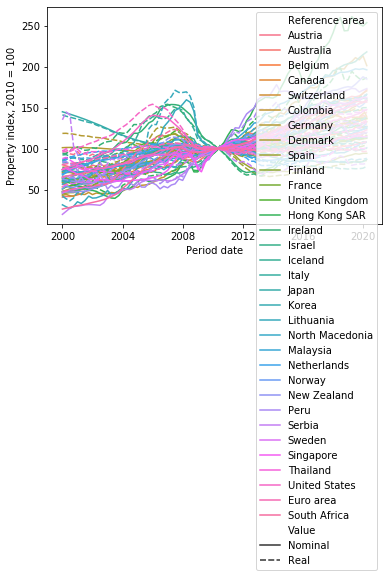

In [154]:
sns.lineplot(x ='Period date', y = 'Property index, 2010 = 100', hue = 'Reference area', ci=None,style = 'Value',data = df_property_since_2000_long)

Oups, that looks quite messy. Let me focus first on real price index only.

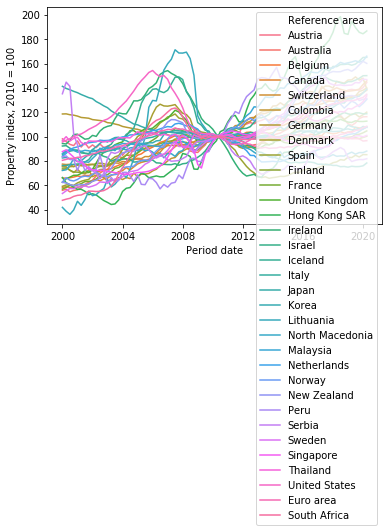

In [155]:
sns.lineplot(x ='Period date', y = 'Property index, 2010 = 100',ci=None, hue = 'Reference area',data = df_property_since_2000_long[df_property_since_2000_long.VALUE=='R'])

It is still not clear what we see here. Let me create separate charts for each reference area, indicating type of chart by colour.

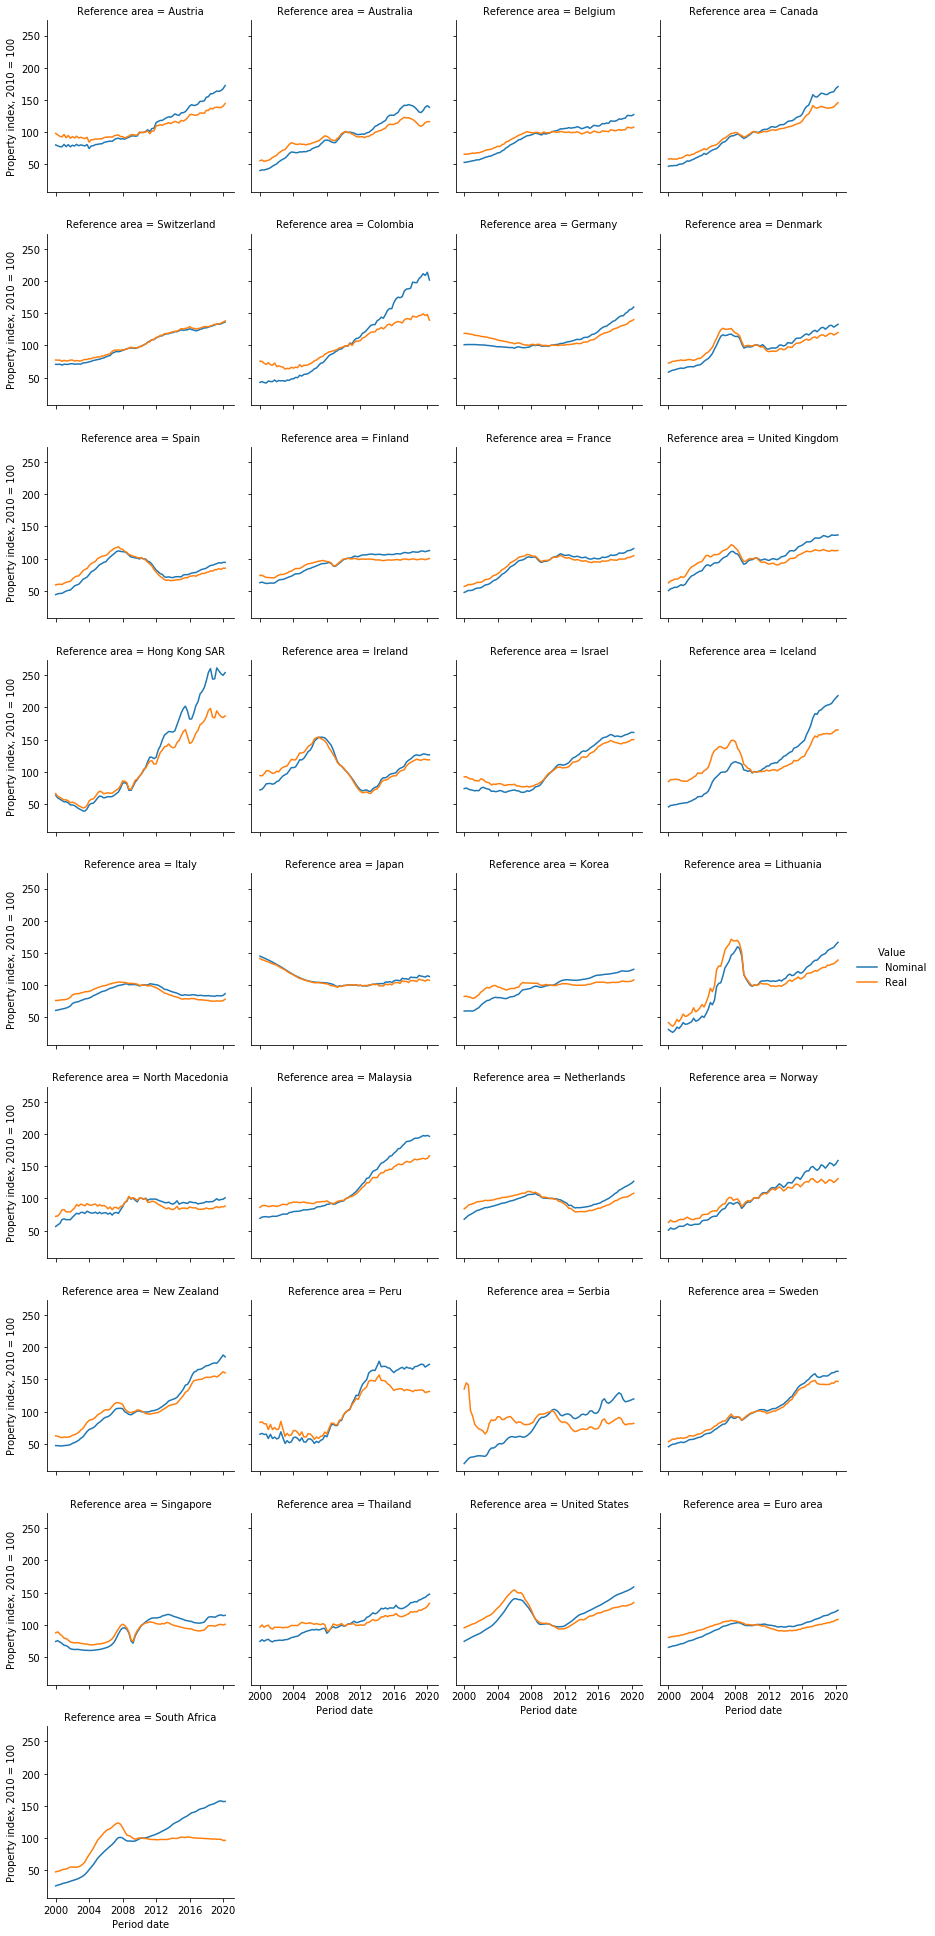

In [156]:
f = sns.FacetGrid(df_property_since_2000_long, hue = 'Value',col='Reference area',col_wrap=4, margin_titles=True)
f.map(sns.lineplot,'Period date', 'Property index, 2010 = 100',ci=None)
f.add_legend()

That's very interesting!<br><br>
Just looking at charts we see that prices increased a lot in Hong Kong while they have actually decreased in Japan. But let us have a better look into the data to see the actual results. I will now calculate a percentage change of price (both real and nominal) between Q1 2020 and Q1 2000 by reference area.

In [157]:
df_subset = df_property_since_2000_long[df_property_since_2000_long['Period'].isin(['2000-Q1','2020-Q1'])]

df_subset = df_subset.sort_values(['Reference area','Period date'],ascending=['True','True'])

df_subset['Percentage change']= (df_subset.groupby(['Reference area','Value'])['Property index, 2010 = 100'].apply(pd.Series.pct_change)*100)
df_subset= df_subset[df_subset['Period']!='2000-Q1'].pivot(index = 'Reference area',columns = 'Value', values = 'Percentage change')
df_subset_real = df_subset.Real.copy().sort_values(ascending=False)
df_subset_nom = df_subset.Nominal.copy().sort_values(ascending=False)
df_subset_diff = (df_subset_nom - df_subset_real).sort_values(ascending=False)

In [158]:
print("The top 5 countries by real price increase are:\n"),print(df_subset_real.head(5)),print("\nwhile the bottom 5 countries in this regard are:\n"),print(df_subset_real.tail(5))

The top 5 countries by real price increase are:

Reference area
Lithuania        223.868889
Hong Kong SAR    177.552402
Sweden           175.940820
New Zealand      158.643599
Canada           144.687117
Name: Real, dtype: float64

while the bottom 5 countries in this regard are:

Reference area
Germany      16.477043
Singapore    13.789000
Italy        -0.282685
Japan       -23.285677
Serbia      -40.005145
Name: Real, dtype: float64


(None, None, None, None)

In [159]:
print("On the other hand the top 5 countries by nominal price increase are:\n"),print(df_subset_nom.head(5)),print("\nwhile the bottom 5 countries in this regard are:\n"),print(df_subset_nom.tail(5))

On the other hand the top 5 countries by nominal price increase are:

Reference area
Serbia          503.043058
South Africa    501.575401
Lithuania       420.796153
Colombia        398.876693
Iceland         369.299643
Name: Nominal, dtype: float64

while the bottom 5 countries in this regard are:

Reference area
North Macedonia    74.854008
Germany            54.570045
Singapore          53.791638
Italy              38.044034
Japan             -20.988351
Name: Nominal, dtype: float64


(None, None, None, None)

So no matter how we look at the data, Japan is the only country where both real and nominal prices actually decreased over the analysed period of time, and we are talking about over 20% decrease, which is quite a lot! Interestingly, in Italy and Serbia prices decreased over time in real terms while grew visibly in nominal terms (especially interesting is the latter case).<br>
On another side we have Lithuania and Hong Kong for real price change and Serbia and South Africa for nominal price change.

It is clear here that the initial observation suggesting the highest price growth in Hong Kong was incorrect. Looking more carefully at charts below one can see that prices actually started to grow significantly only in the second decade of the analysed period after initially having decreased a bit.<br>
In case of Lithuania we observe quite significant price increase from the very low initial level, what made the real price increase the highest among analysed regions. Please note a significant bump at the time of the Global Financial Crisis (GFC).<br>
Nominal prices in Serbia have been growing from a very low level since the beginning of 2000, what has helped reaching to top spot in regards to nominal prices. Significant inflation means though that real prices have actually decreased since 2000.<br>
Lastly, South Africa experienced quite a boom in regards to nominal property prices, however higher inflation since the GFC stopped growth of real prices, which at the beginning of 2020 were not far away from 2010 prices.

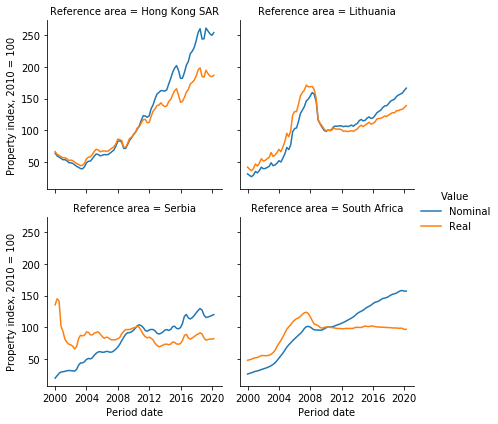

In [160]:
top_2_nom_real = list(set(df_subset_real.head(2).index.append(df_subset_nom.head(2).index)))
bottom_2_nom_real = list(set(df_subset_real.tail(2).index.append(df_subset_nom.tail(2).index)))

g = sns.FacetGrid(df_property_since_2000_long[df_property_since_2000_long['Reference area'].isin(top_2_nom_real)], hue = 'Value',col='Reference area',col_wrap=2, margin_titles=True)
g.map(sns.lineplot,'Period date', 'Property index, 2010 = 100',ci=None)
g.add_legend()

At another end of the spectrum we have the case of Japan which was initially facing consequences of the lost decade of 90s. The property prices only started growing a few years ago thanks to, among other, Abonomics.<br>
Italy's case is quite different. The first analysed decade was a decade of substantial property price growth which was abrubtly stopped and then reversed as a result of the GFC and subsequent European debt crisis.<br>
Case of Serbia is more interesting. As already mentioned, residential property prices have increased significantly in nominal terms since the beginning of 2000, yet strong inflation (especially in the first decade of the current millenium) caused property prices in real terms to be **40%** below their level 20 years ago.<br>
There are only three countries presented below as Japan appears to be at the bottom in regards to both nominal and real residential property prices change since 2000.

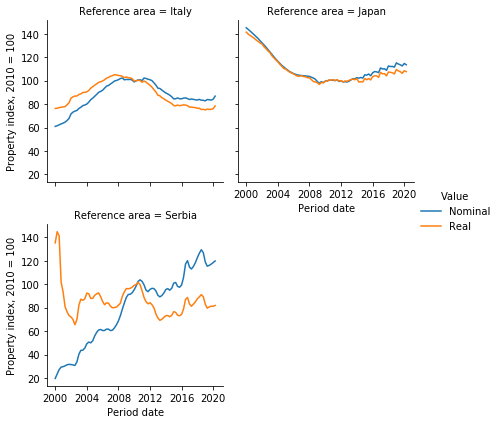

In [161]:
g = sns.FacetGrid(df_property_since_2000_long[df_property_since_2000_long['Reference area'].isin(bottom_2_nom_real)], hue = 'Value',col='Reference area',col_wrap=2, margin_titles=True)
g.map(sns.lineplot,'Period date', 'Property index, 2010 = 100',ci=None)
g.add_legend()

Let's now look at the regions where the difference in growth between nominal and real prices was the highest or lowest.

In [162]:
print("The top 5 countries by difference between nominal and real price increase are:\n"),print(df_subset_diff.head(5)),print("\nwhile the bottom 5 countries in this regard are:\n"),print(df_subset_diff.tail(5))

The top 5 countries by difference between nominal and real price increase are:

Reference area
Serbia          543.048203
South Africa    399.770834
Colombia        303.167572
Iceland         275.243534
Lithuania       196.927264
dtype: float64

while the bottom 5 countries in this regard are:

Reference area
Singapore      40.002638
Italy          38.326720
Germany        38.093002
Switzerland    14.997262
Japan           2.297326
dtype: float64


(None, None, None, None)

Let us visualise top and bottom 4 below. The difference between nominal and real price changes is explained mainly by inflation.<br>
Personally I am surprised to see Iceland having so significant difference between real and nominal property price changes, however external sources are confirming very high inflation rates in consequence of the GFC.<br>
On the other hand, both Japan and Switzerland do not surprise at all since they are both known for stable prices.

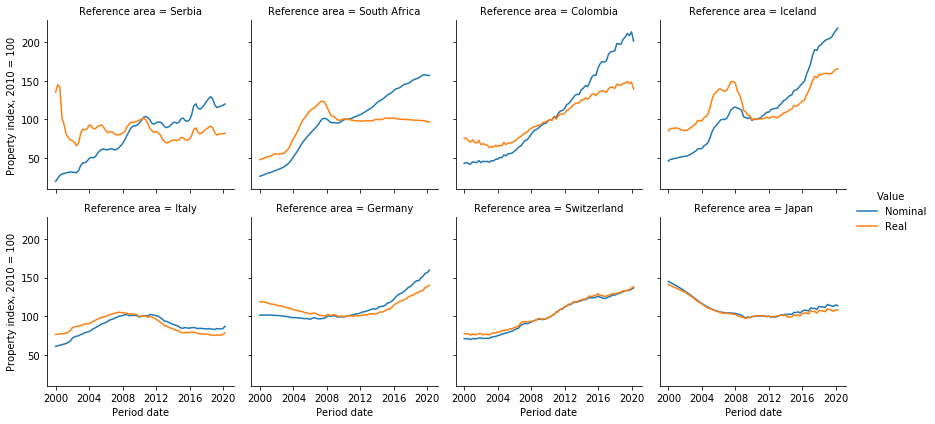

In [163]:
top_bottom_4_diff = list(df_subset_diff.head(4).index.append(df_subset_diff.tail(4).index))
df_diff = df_property_since_2000_long[df_property_since_2000_long['Reference area'].isin(top_bottom_4_diff)]
g = sns.FacetGrid(df_diff, hue = 'Value',col='Reference area',col_wrap=4, margin_titles=True,col_order = top_bottom_4_diff)
g.map(sns.lineplot,'Period date', 'Property index, 2010 = 100',ci=None)
g.add_legend()